In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

In [18]:
# Data Import

from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [19]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [27]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [28]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [29]:
data = df

In [30]:
data.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [46]:
# Div X, y

X = data.drop(columns=['Pulse'], axis=1).values
y = data['Pulse'].values

Y = pd.get_dummies(y).values

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [55]:
# n_features : represents the number of features you want to have for each time step
n_features = 1

# Make X to 3D format
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [56]:
X.shape

(20, 5, 1)

In [57]:
import numpy as np

# Make Y suitable for X.shape
Y = np.argmax(Y, axis=1).reshape(-1, 1)

In [58]:
Y.shape

(20, 1)

In [59]:
# X.shape[0] = rows, X.shape[1] = columns(In code, it's features)
n_steps = X.shape[1]
n_steps

5

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [103]:
# Make model
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=1, padding='valid'))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1, padding='valid'))
    model.add(Flatten())
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(1)) 
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
    
    return model

model = build_model()

model.summary()

print("input_shape => ", n_steps,  n_features)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 4, 64)             192       
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 4, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_28 (Conv1D)          (None, 3, 64)             8256      
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 192)               0         
                                                                 
 dense_24 (Dense)            (None, 5)               

In [107]:
# model train
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0849 - val_mse: 0.0849
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0849 - val_mse: 0.0849
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0848 - val_mse: 0.0848
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0847 - val_mse: 0.0847
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0847 - mse: 0.0847 - val_loss: 0.0846 - val_mse: 0.0846
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0846 - val_mse: 0.0846
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0845 - val_mse: 0.0845
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0845 - mse: 0.08

1/1 [==============================] - 0s 31ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 64/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 65/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 66/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 67/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 68/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 69/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 70/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0826 - mse: 0.0826 - 

In [108]:
# model test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.0826 - mse: 0.0826


[0.08264463394880295, 0.08264463394880295]

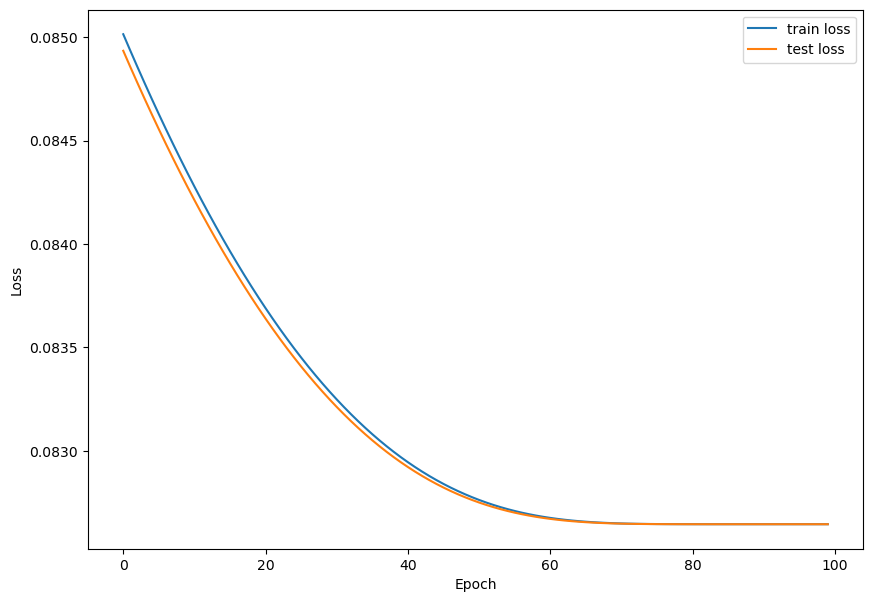

In [109]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()